<a href="https://colab.research.google.com/github/Ebonica/COB-DATA-SCIENCE-EBONICA-SALETH-/blob/main/CODES_ON_BYTES(PHASE_1)TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLEANING THE DATASET: REPLACING MISSING VALUES, REMOVING OUTLIERS etc.**

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**READING THE GIVEN DATASET**

In [3]:
df = pd.read_csv("dataset - netflix1.csv")

**HANDLING THE MISSING VALUES**

**REPLACING MISSING VALUES WITH THE MEAN OF THE COLUMN**

In [4]:
df.fillna(df.mean(), inplace=True)


<ipython-input-4-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


**DROPING ROWS WITH MISSING VALUES**

In [13]:
df.dropna(axis=0, inplace=True)

In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

**REMOVING OUTLIERS FROM THE DATASET**

In [38]:
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

threshold = 3
df_no_outliers = remove_outliers_zscore(df, threshold)

print(df_no_outliers)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

**SAVING THE CLEANED DATASET**

In [12]:
df_no_outliers.to_csv("cleaned_dataset.csv", index=False)

**DATA ANALYSIS**

In [14]:
print("First few rows of the dataset:")
print(df_no_outliers.head())


First few rows of the dataset:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV A

In [15]:
print("Last few rows of the dataset:")
print(df_no_outliers.tail())


Last few rows of the dataset:
     show_id     type               title   director        country  \
8785   s8797  TV Show          Yunus Emre  Not Given         Turkey   
8786   s8798  TV Show           Zak Storm  Not Given  United States   
8787   s8801  TV Show  Zindagi Gulzar Hai  Not Given       Pakistan   
8788   s8784  TV Show                Yoko  Not Given       Pakistan   
8789   s8786  TV Show                 YOM  Not Given       Pakistan   

      date_added  release_year rating   duration  \
8785   1/17/2017          2016  TV-PG  2 Seasons   
8786   9/13/2018          2016  TV-Y7  3 Seasons   
8787  12/15/2016          2012  TV-PG   1 Season   
8788   6/23/2018          2016   TV-Y   1 Season   
8789    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ... 

In [16]:
print("Dataset Information:")
print(df_no_outliers.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8573 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8573 non-null   object
 1   type          8573 non-null   object
 2   title         8573 non-null   object
 3   director      8573 non-null   object
 4   country       8573 non-null   object
 5   date_added    8573 non-null   object
 6   release_year  8573 non-null   int64 
 7   rating        8573 non-null   object
 8   duration      8573 non-null   object
 9   listed_in     8573 non-null   object
dtypes: int64(1), object(9)
memory usage: 736.7+ KB
None


In [17]:
print("\nSummary statistics:")
print(df_no_outliers.describe())


Summary statistics:
       release_year
count   8573.000000
mean    2015.195497
std        5.893838
min     1988.000000
25%     2014.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [18]:
print("\nMissing Values:")
print(df_no_outliers.isnull().sum())


Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [19]:
print("\nColumns:")
print(df_no_outliers.columns)


Columns:
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [20]:
print("\nShape:")
print(df_no_outliers.shape)


Shape:
(8573, 10)


In [21]:
print("\nDATA TYPES:")
print(df_no_outliers.dtypes)


DATA TYPES:
show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [23]:
print("\n Access the 8th row (index 7)")
df_no_outliers.iloc[7]


 Access the 8th row (index 7)


show_id                                                      s939
type                                                        Movie
title                             Motu Patlu in the Game of Zones
director                                              Suhas Kadav
country                                                     India
date_added                                               5/1/2021
release_year                                                 2019
rating                                                      TV-Y7
duration                                                   87 min
listed_in       Children & Family Movies, Comedies, Music & Mu...
Name: 7, dtype: object

In [24]:
unique_counts = df_no_outliers.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
show_id         8573
type               2
title           8570
director        4403
country           84
date_added      1711
release_year      34
rating            14
duration         210
listed_in        487
dtype: int64


In [39]:
nunique_counts = df_no_outliers.nunique()
for column in df_no_outliers.columns:
    unique_values = df_no_outliers[column].unique()
    value_counts = df_no_outliers[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: show_id
Number of unique values: 8573
Unique values: ['s1' 's3' 's6' ... 's8801' 's8784' 's8786']
Value counts:
s1       1
s8009    1
s8027    1
s8026    1
s8025    1
        ..
s3927    1
s3924    1
s3923    1
s3922    1
s8786    1
Name: show_id, Length: 8573, dtype: int64

Column: type
Number of unique values: 2
Unique values: ['Movie' 'TV Show']
Value counts:
Movie      5922
TV Show    2651
Name: type, dtype: int64

Column: title
Number of unique values: 8570
Unique values: ['Dick Johnson Is Dead' 'Ganglands' 'Midnight Mass' ...
 'Zindagi Gulzar Hai' 'Yoko' 'YOM']
Value counts:
9-Feb                                       2
22-Jul                                      2
15-Aug                                      2
Dick Johnson Is Dead                        1
Siddhant                                    1
                                           ..
The Perfect Date                            1
Dabbe: The Possession                       1
Dabbe 5: Zehr-i Cin                 

**PREPROCESSING THE DATASET**

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_no_outliers = df_no_outliers.copy()
df_no_outliers['rating_encoded'] = label_encoder.fit_transform(df_no_outliers['rating'])


In [32]:
df_no_outliers.dtypes

show_id           object
type              object
title             object
director          object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
rating_encoded     int64
dtype: object

**DATA VISUALIZATION**

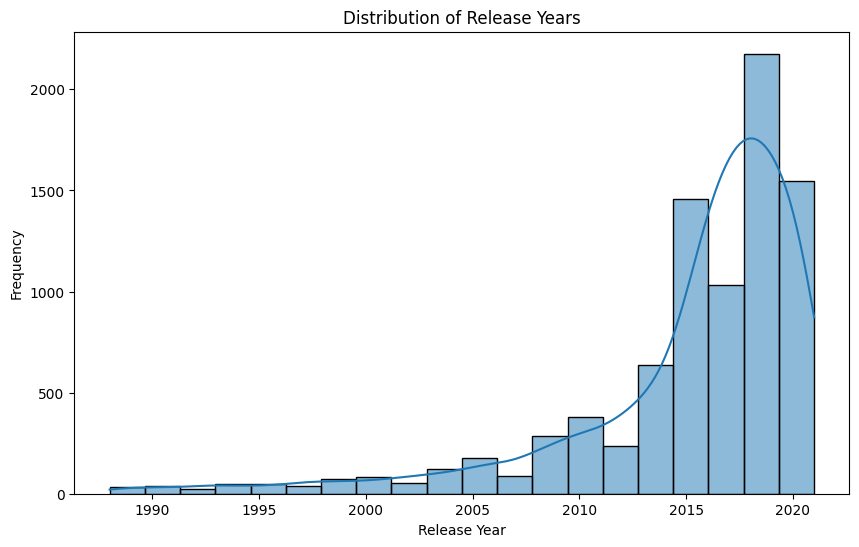

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-35-8e772cb97ab8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outliers.corr()


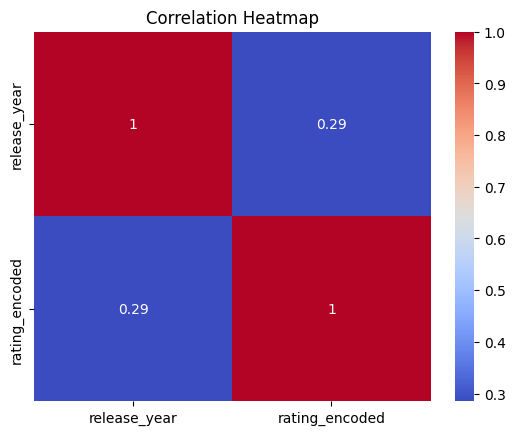

In [35]:
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

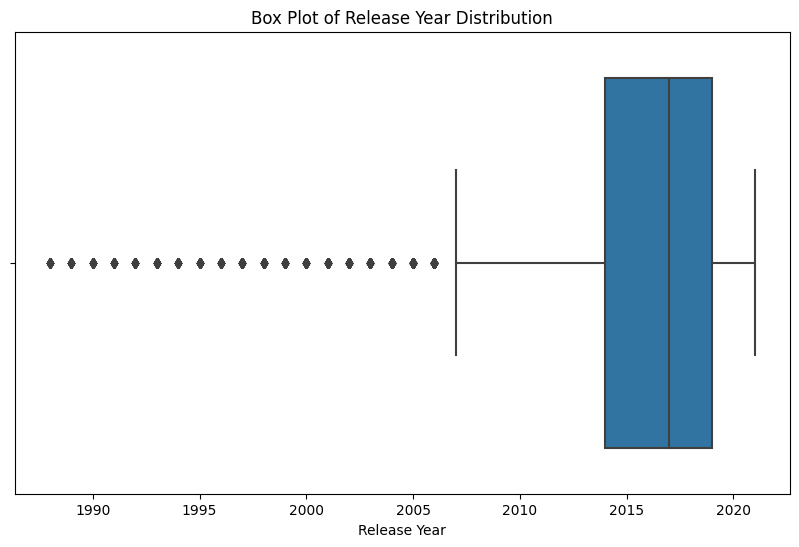

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_year', data=df_no_outliers)
plt.title('Box Plot of Release Year Distribution')
plt.xlabel('Release Year')
plt.show()

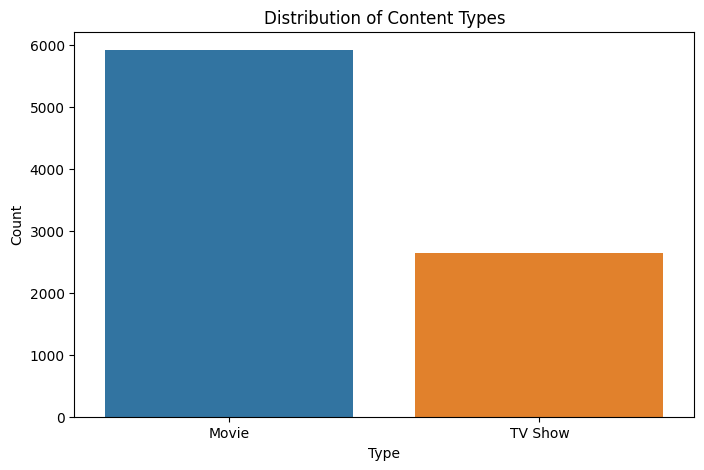

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df_no_outliers)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()